<a href="https://colab.research.google.com/github/brunonbn/intro-data-science/blob/main/CriandoAgrupamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise VII

## Criando Agrupamentos

In [27]:
import pandas as pd

In [28]:
dados = pd.read_csv("Aluguel_Residencial4.csv", sep = ";")

In [29]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [30]:
dados['Valor'].mean()

5046.172821405663

### Ver https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [31]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados_bairros = dados[selecao]
dados_bairros['Bairro'].value_counts()

Barra da Tijuca    3863
Copacabana         2644
Ipanema            1764
Leblon             1258
Tijuca             1100
Botafogo            873
Flamengo            714
Name: Bairro, dtype: int64

In [32]:
grupo_bairro = dados_bairros.groupby('Bairro')

In [33]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [34]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [35]:
for bairro, dados in grupo_bairro:
  print(bairro, ' - ', type(dados))

Barra da Tijuca  -  <class 'pandas.core.frame.DataFrame'>
Botafogo  -  <class 'pandas.core.frame.DataFrame'>
Copacabana  -  <class 'pandas.core.frame.DataFrame'>
Flamengo  -  <class 'pandas.core.frame.DataFrame'>
Ipanema  -  <class 'pandas.core.frame.DataFrame'>
Leblon  -  <class 'pandas.core.frame.DataFrame'>
Tijuca  -  <class 'pandas.core.frame.DataFrame'>


In [36]:
for bairro, dados in grupo_bairro:
  print(dados)

                     Tipo           Bairro  ...  Valor M2  Tipo Agregado
5      Casa de Condomínio  Barra da Tijuca  ...     29.33           Casa
14            Apartamento  Barra da Tijuca  ...     25.37    Apartamento
16     Casa de Condomínio  Barra da Tijuca  ...     16.09           Casa
21            Apartamento  Barra da Tijuca  ...     24.00    Apartamento
30            Apartamento  Barra da Tijuca  ...     25.71    Apartamento
...                   ...              ...  ...       ...            ...
21801  Casa de Condomínio  Barra da Tijuca  ...     20.00           Casa
21811         Apartamento  Barra da Tijuca  ...     26.47    Apartamento
21812         Apartamento  Barra da Tijuca  ...     23.47    Apartamento
21813         Apartamento  Barra da Tijuca  ...     39.29    Apartamento
21820  Casa de Condomínio  Barra da Tijuca  ...     33.33           Casa

[3863 rows x 11 columns]
              Tipo    Bairro  Quartos  ...   IPTU  Valor M2  Tipo Agregado
23     Apartamento  Bot

In [37]:
for bairro, data in grupo_bairro:
  print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [38]:
# fazendo a mesma coisa de uma maneira mais simples
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [39]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [40]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [42]:
# pegando apenas algumas estatísticas do grupo - ver no link acima as estatísticas disponíveis
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


### Overview do Matplotlib

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

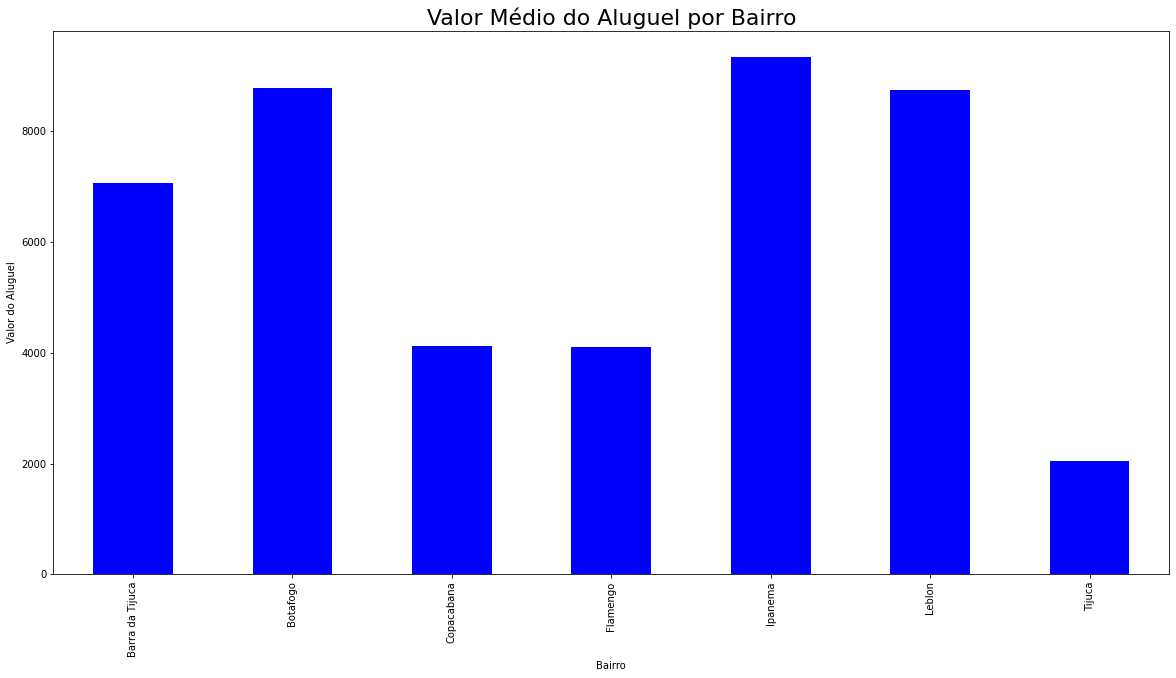

In [46]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

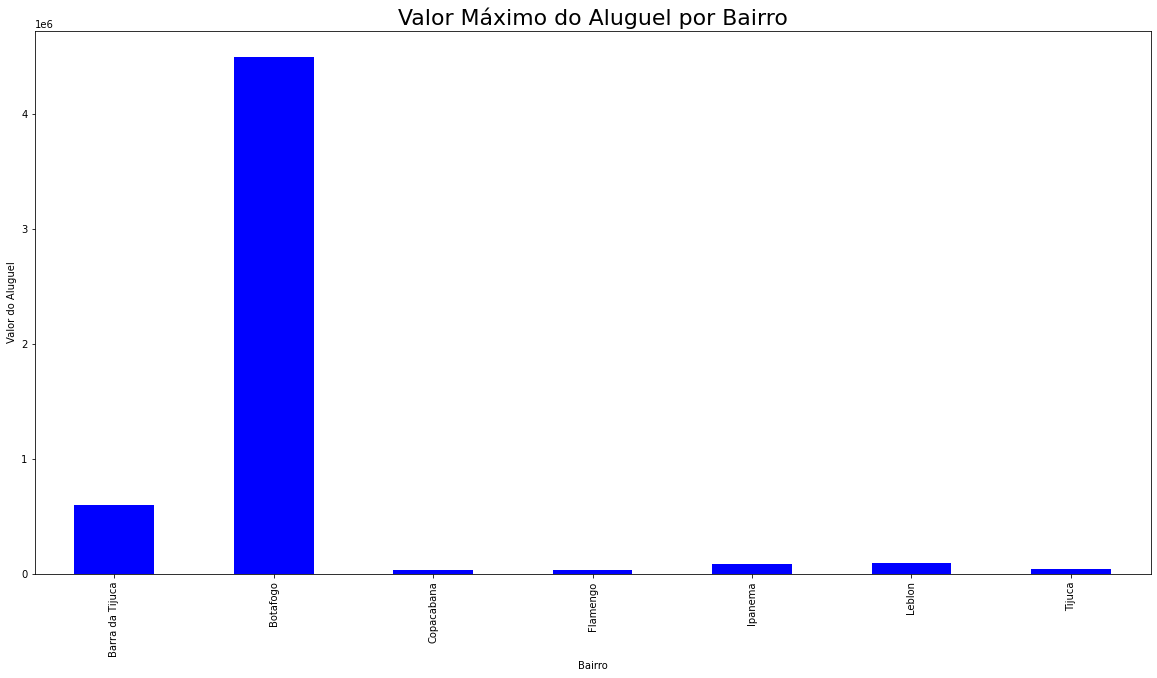

In [47]:
fig2 = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig2.set_ylabel('Valor do Aluguel')
fig2.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})